# 선형 회귀
$$y = w_0x + w_1$$
```
a : 기울기
b : 절편
x : 독립변수
y : 종속변수
```
# 손실함수  MSE
$$J(w_0, w_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - ( w_0x_i + w_1))^2$$
```
선형회귀는 손실함수의 값이 최소가 되는 방향으로 계수(가중치)를 구한다
```



In [ ]:
perch_length.reshape(-1,1)

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

In [ ]:
# 선형 모델
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 훈련
lr.fit(perch_length.reshape(-1, 1), perch_weight)
# 예측
y_predict = lr.predict([[50]])
print(f'기울기 : {lr.coef_[0]}')
print(f'절편 : {lr.intercept_}')
print(f'예측 : {y_predict}')
lr.coef_[0]*50+lr.intercept_

기울기 : 36.938375967836976
절편 : -648.0775582457385
예측 : [1198.84124015]


np.float64(1198.84124014611)

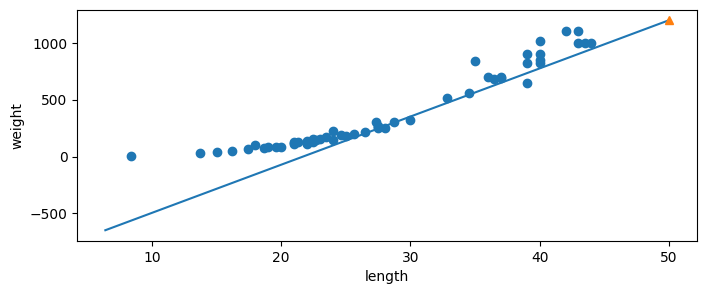

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
plt.scatter(perch_length, perch_weight)
plt.plot([min(perch_length)-2, 50], [lr.predict([[0]]), lr.predict([[50]])])
plt.plot(50,lr.predict([[50]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 학습데이터와 모델의 시각화

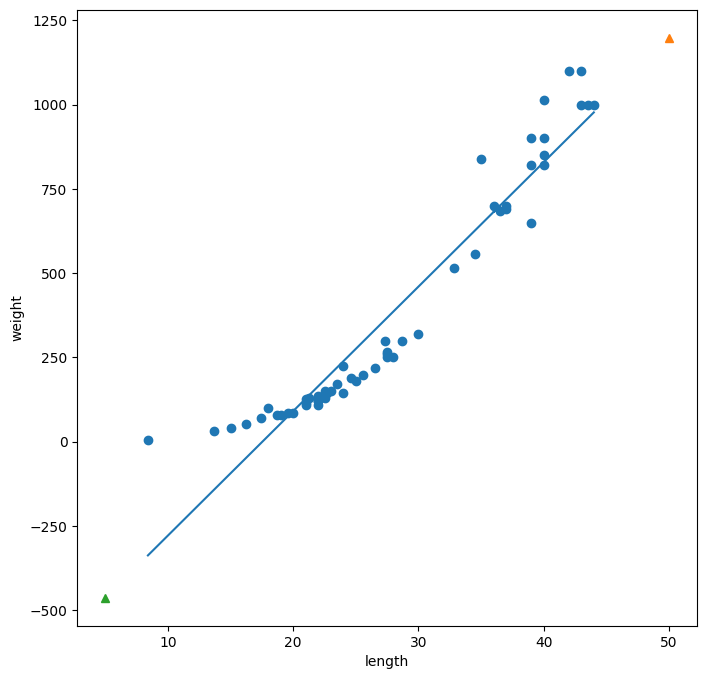

In [ ]:
import matplotlib.pyplot as plt

y_pred = lr.predict(perch_length.reshape(-1, 1))

plt.figure(figsize=(8,8))
plt.scatter(perch_length, perch_weight)
plt.plot(perch_length, y_pred)
plt.plot(50,lr.predict([[50]]),marker='^')
plt.plot(5,lr.predict([[5]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 다항 회귀
$$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_n x^n + \epsilon$$
```
기존선형회귀를 비선형 관계로 확장한 모델
x값의 거듭제곱(제곱, 세제곱, ... )을 추가해서 복잡한 패턴을 학습가능
n이 클수록 곡선이 더 유연해진다. 그러나 과적합 위험
```

$$y = w_0 + w_1 x + w_2 x^2$$

In [ ]:
import numpy as np
np.stack( [perch_length, perch_length**2]).reshape(-1,2)

array([[   8.4 ,   13.7 ],
       [  15.  ,   16.2 ],
       [  17.4 ,   18.  ],
       [  18.7 ,   19.  ],
       [  19.6 ,   20.  ],
       [  21.  ,   21.  ],
       [  21.  ,   21.3 ],
       [  22.  ,   22.  ],
       [  22.  ,   22.  ],
       [  22.  ,   22.5 ],
       [  22.5 ,   22.7 ],
       [  23.  ,   23.5 ],
       [  24.  ,   24.  ],
       [  24.6 ,   25.  ],
       [  25.6 ,   26.5 ],
       [  27.3 ,   27.5 ],
       [  27.5 ,   27.5 ],
       [  28.  ,   28.7 ],
       [  30.  ,   32.8 ],
       [  34.5 ,   35.  ],
       [  36.5 ,   36.  ],
       [  37.  ,   37.  ],
       [  39.  ,   39.  ],
       [  39.  ,   40.  ],
       [  40.  ,   40.  ],
       [  40.  ,   42.  ],
       [  43.  ,   43.  ],
       [  43.5 ,   44.  ],
       [  70.56,  187.69],
       [ 225.  ,  262.44],
       [ 302.76,  324.  ],
       [ 349.69,  361.  ],
       [ 384.16,  400.  ],
       [ 441.  ,  441.  ],
       [ 441.  ,  453.69],
       [ 484.  ,  484.  ],
       [ 484.  ,  484.  ],
 

In [ ]:
import numpy as np
perch_length_poly = np.column_stack( [perch_length, perch_length**2])
# 데이터 확인
print(perch_length_poly[:5])
# 학습
lr = LinearRegression()
lr.fit(perch_length_poly, perch_weight)
print(f'기울기 : {lr.coef_} 절편 : {lr.intercept_}')

[[  8.4   70.56]
 [ 13.7  187.69]
 [ 15.   225.  ]
 [ 16.2  262.44]
 [ 17.4  302.76]]
기울기 : [-22.4189282    1.02094922] 절편 : 131.6453196989612


[[  8.4   70.56]
 [ 13.7  187.69]
 [ 15.   225.  ]
 [ 16.2  262.44]
 [ 17.4  302.76]]
기울기 : [-22.4189282    1.02094922] 절편 : 131.6453196989612


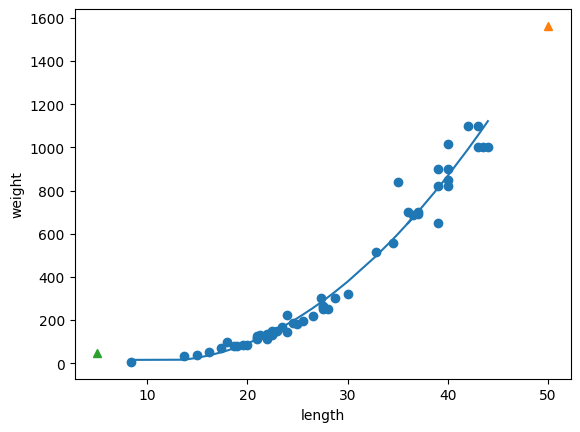

In [ ]:
import numpy as np
perch_length_poly = np.column_stack( [perch_length, perch_length**2])
# 데이터 확인
print(perch_length_poly[:5])
# 학습
lr = LinearRegression()
lr.fit(perch_length_poly, perch_weight)
print(f'기울기 : {lr.coef_} 절편 : {lr.intercept_}')
plt.scatter(perch_length, perch_weight)
plt.plot(perch_length, lr.predict(perch_length_poly))
plt.plot(50,lr.predict([[  50 ,  2500]]),marker='^')
plt.plot(5,lr.predict([[  5 ,  25]]),marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 다항 특성을 가지는 데이터를 비선형으로 만들기

손실함수 MSE
$$J(w_0, w_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - ( w_0x_i + w_1))^2$$
릿지 - L2규제
$$J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij})^2 + \lambda \sum_{j=1}^{p} w_j^2$$
라쏘 - L1규제
$$J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - w_0 - \sum_{j=1}^{p} w_j x_{ij})^2 + \lambda \sum_{j=1}^{p} |w_j|$$

```
        릿지  vs                      라쏘
        L2                            L1
가중치  작게(0은아님)                 일부가중치를 0으로
특징    다중공선성,모델복잡도 감소    중요변수만 선택,차원축소
언제     다중공선성이 있는경우        중요변수만 남기
공통점                 과적합 방지
```

In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [ ]:
print(f'original shape : {perch_full.shape}')
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
perch_poly = poly.fit_transform(perch_full)
print(f'poly shape : {perch_poly.shape}')
poly.get_feature_names_out()

original shape : (56, 3)
poly shape : (56, 9)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, LinearRegression

def get_score(degree = 2,model_name = 'lr'):
  poly = PolynomialFeatures(include_bias=False,degree=degree)
  perch_poly = poly.fit_transform(perch_full)
  train_input, test_input, train_target, test_target = train_test_split(perch_poly, perch_weight, random_state=42)

  ss = StandardScaler()
  train_scaled = ss.fit_transform(train_input)
  test_scaled = ss.transform(test_input)

  # 모델정의
  if model_name == 'lr':
    lr_d2 = LinearRegression()
  elif model_name == 'ridge':
    lr_d2 = Ridge()
  elif model_name == 'lasso':
    lr_d2 = Lasso()
  # 모델학습
  lr_d2.fit(train_scaled, train_target)
  print(f'lr : train: {lr_d2.score(train_scaled, train_target)} test: {lr_d2.score(test_scaled, test_target)}')

In [ ]:
for i in range(1,6):
  print(f'degree : {i}',end='\t')
  get_score(i)

degree : 1	lr : train: 0.9559326821885706 test: 0.8796419177546367
degree : 2	lr : train: 0.9903183436982124 test: 0.9714559911594131
degree : 3	lr : train: 0.9963872340980034 test: 0.9410534492218112
degree : 4	lr : train: 0.999528689807305 test: -6.786696959975059
degree : 5	lr : train: 1.0 test: -358.85068551974916


In [ ]:
get_score(5,'ridge')
get_score(5,'lasso')

lr : train: 0.9896101671037343 test: 0.9790693977615387
lr : train: 0.989789897208096 test: 0.9800593698421883


# 리지와 라쏘의 하이퍼 파라메터 튜닝
```
적절한 규제 강도 찾기
```

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso
import pandas as pd
# 데이터 취득
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

# 데이터를 비선형
poly = PolynomialFeatures(include_bias=False,degree=5)
perch_poly = poly.fit_transform(perch_full)

# 데이터를 표준화
ss = StandardScaler()
perch_full = ss.fit_transform(perch_poly)

# 분할
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

alpha_lists = [0.001,0.01,0.1,1.0,10,100]
ridge_train_scores = []
ridge_test_scores = []
lasso_train_scores = []
lasso_test_scores = []
for alpha in alpha_lists:
  # ridge 모델 정의
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_input, train_target)
  ridge_train_scores.append(ridge.score(train_input, train_target))
  ridge_test_scores.append(ridge.score(test_input, test_target))

  # lasso 모델 정의
  lasso = Lasso(alpha=alpha)
  lasso.fit(train_input, train_target)
  lasso_train_scores.append(lasso.score(train_input, train_target))
  lasso_test_scores.append(lasso.score(test_input, test_target))
  # 규제강도별 모델에적용해서 결정계수 값  score 을  리스트에 담기

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.337e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+03, tolerance: 5.183e

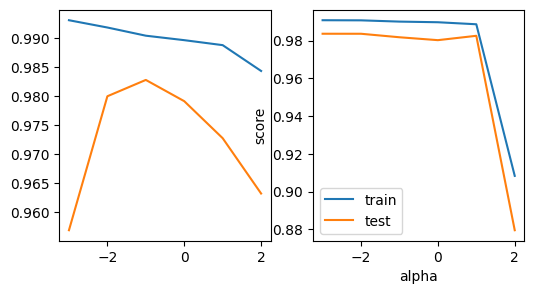

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(np.log10(alpha_lists),ridge_train_scores,label='train')
plt.plot(np.log10(alpha_lists),ridge_test_scores,label='test')
------99999999999999999999999999999999999999999999999999999999999999999999999999999999
plt.subplot(1,2,2)
plt.plot(np.log10(alpha_lists),lasso_train_scores,label='train')
plt.plot(np.log10(alpha_lists),lasso_test_scores,label='test')

plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.show()

In [70]:
print(ridge_test_scores)
print(lasso_test_scores)

[0.9569149386027914, 0.9799601201196285, 0.9827696359682672, 0.9791124746385776, 0.9727459642993214, 0.963228784085066]
[0.9836873186092867, 0.983677053873293, 0.9818219041153448, 0.9802826595078667, 0.982595350988852, 0.8794922756594648]


# 실전 테스트
# 데이터
```
회귀모델에 대해서는
  다중공선성 문제... 상관관계가 높은 변수들은 모델의 학습력을 떨어뜨림.. 학습을 위해서 한개는 제거
  학습데이터가 왜 독립변수라고 부르는지 생각해 볼것
특성공학
  다양한 특성의 데이터를 찾기
  날자데이터 - 년 월 일 시간, 주말여부
  연속형 숫자데이터 - > 구간을 나눠서 범주형으로
표준화
  StandardScaler  평균 0 ,표준편차 1
이상치
  IQR
결측치
  다양한 보간방법
클래스 불균형
  orversampling
    SMOTE, RandomOverSampler
  downsampling
    RandomUnderSampler
```

# 모델
```
분류
  KNeighborsClassifier
회귀
  KNeighborsRegression
  LinearRegression, Ridge, Lasso  
```


In [259]:
# MedInc: 중간 소득.
# HouseAge: 주택의 중간 연령.
# AveRooms: 가구당 평균 방 개수.
# AveBedrms: 가구당 평균 침실 개수.
# Population: 지역 내 총 인구 수.
# AveOccup: 가구당 평균 거주 인원.
# Latitude, Longitude: 지역의 위도와 경도.
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
print(house.keys())
house_df = pd.DataFrame(house.data,columns=house.feature_names)
house_df.head()
house_df['price'] = house.get('target')

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [209]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


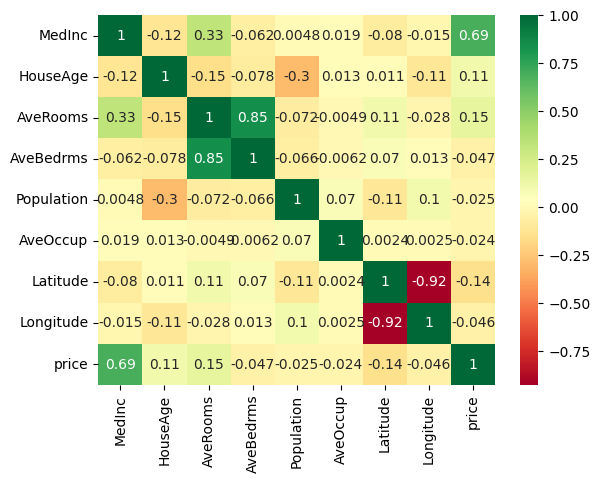

In [210]:
corr = house_df.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

In [211]:
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


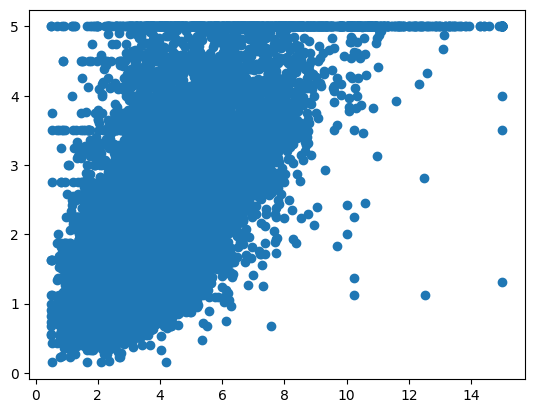

In [212]:
plt.scatter(house_df['MedInc'],house_df['price'])

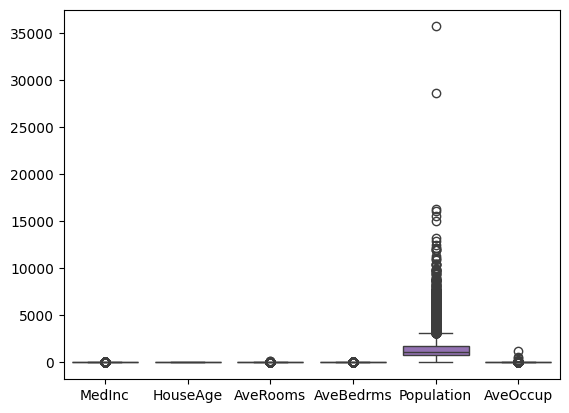

In [213]:
sns.boxplot(house_df.iloc[:,:-3])
plt.show()

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


# 베이스라인모델
X_tr, X_val, y_tr, y_val = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1], random_state=42)

kr = KNeighborsRegressor()
kr.fit(X_tr, y_tr)

print(f'베이스라인 모델 : {kr.score(X_tr, y_tr)},  {kr.score(X_val,y_val)}')

베이스라인 모델 : 0.44619663323537884,  0.14434206676911643


In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

X_tr, X_val, y_tr, y_val = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1], random_state=42)

#스케일링
ss = StandardScaler()
ms = MinMaxScaler()

X_trs = ss.fit_transform(X_tr)
X_vals = ss.transform(X_val)
X_trm = ms.fit_transform(X_tr)
X_valm = ms.transform(X_val)

kr = KNeighborsRegressor()
kr.fit(X_trs, y_tr)
pred = kr.predict(X_vals)
print(f'standardscaler : {r2_score(pred, y_val)}')

kr = KNeighborsRegressor()
kr.fit(X_trm, y_tr)
pred = kr.predict(X_valm)
print(f'minmaxscaler : {r2_score(pred, y_val)}')

standardscaler : 0.5414386252492231
minmaxscaler : 0.6008259264144165


In [235]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

for col in ['price']:
  Q3 = house_df[col].quantile(.75)
  Q1 = house_df[col].quantile(.25)
  IQR = Q3 - Q1
  upper = Q3 + 1.35*IQR
  lower = Q1 - 1.35*IQR
  house_df = house_df[(house_df[col] > lower )&(house_df[col] < upper)]

X_tr, X_val, y_tr, y_val = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1], random_state=42)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

#스케일링
ms = MinMaxScaler()

X_trm = ms.fit_transform(X_tr)
X_valm = ms.transform(X_val)

kr = KNeighborsRegressor()
kr.fit(X_trm, y_tr)
pred = kr.predict(X_valm)
print(f'이상치제거 : {r2_score(pred, y_val)}')

(14595, 8) (4866, 8) (14595,) (4866,)
이상치제거 : 0.5561929779444861


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score

for col in ['MedInc']:
  Q3 = house_df[col].quantile(.75)
  Q1 = house_df[col].quantile(.25)
  IQR = Q3 - Q1
  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR
  house_df = house_df[(house_df[col] > lower )&(house_df[col] < upper)]

X_tr, X_val, y_tr, y_val = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1], random_state=42)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

#스케일링
ms = MinMaxScaler()

X_trm = ms.fit_transform(X_tr)
X_valm = ms.transform(X_val)

kr = KNeighborsRegressor()
kr.fit(X_trm, y_tr)
pred = kr.predict(X_valm)
print(f'이상치제거 : {r2_score(pred, y_val)}')

(14846, 8) (4949, 8) (14846,) (4949,)
이상치제거 : 0.41369828761784144


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

X_tr, X_val, y_tr, y_val = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1], random_state=42)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

poly = PolynomialFeatures(include_bias=False,degree=3)
X_trp = poly.fit_transform(X_tr)
X_valp = poly.transform(X_val)

ss = StandardScaler()
X_trs = ss.fit_transform(X_trp)
X_vals = ss.transform(X_valp)

ridge = Ridge()

lr = Ridge()
lr.fit(X_trs, y_tr)
print(lr.score(X_trs, y_tr))
print(lr.score(X_vals, y_val))

(15480, 8) (5160, 8) (15480,) (5160,)
0.7033825365288915
0.687843502220072


# 베이스 모델 찾기 - KNeighborsRegressor

In [339]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()
y = house.target
X = house.data
# 스케일링
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
# 데이터 분할
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X_scaled, y, random_state=42)
# 모델 정의
n_neighbors = list(range(1,20))
train_scores, test_scores = [],[]
for n in n_neighbors:
  kn = KNeighborsRegressor(n_neighbors=n)
  kn.fit(train_input, train_target)
  train_scores.append(kn.score(train_input, train_target))
  test_scores.append(kn.score(test_input, test_target))

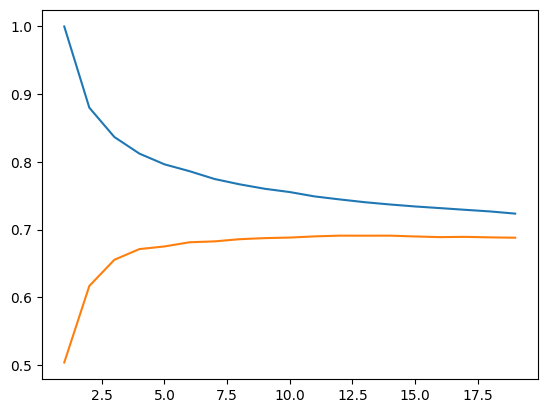

In [264]:
import matplotlib.pyplot as plt
plt.plot(n_neighbors,train_scores)
plt.plot(n_neighbors,test_scores)

In [265]:
kn = KNeighborsRegressor(n_neighbors=19)
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.7236669722500604
0.6880684906398564


In [340]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

X_tr, X_val, y_tr, y_val = train_test_split(house_df.iloc[:,:-1], house_df.iloc[:,-1], random_state=42)
print(X_tr.shape, X_val.shape, y_tr.shape, y_val.shape)

poly = PolynomialFeatures(include_bias=False,degree=3)
X_trp = poly.fit_transform(X_tr)
X_valp = poly.transform(X_val)

ss = StandardScaler()
X_trs = ss.fit_transform(X_trp)
X_vals = ss.transform(X_valp)

ridge = Ridge()

lr = Ridge()
lr.fit(X_trs, y_tr)
print(lr.score(X_trs, y_tr))
print(lr.score(X_vals, y_val))

(15480, 8) (5160, 8) (15480,) (5160,)
0.7033825365288915
0.687843502220072


In [359]:
import kagglehub
from glob import glob

path = kagglehub.dataset_download("kukuroo3/churn-model-data-set-competition-form")

file_paths = glob(path+'/*.*')
X_df = pd.read_csv(file_paths[0])
y_df = pd.read_csv(file_paths[2])
df = pd.merge(X_df,y_df,on='CustomerId')
X = df.drop(['CustomerId','Exited'],axis=1)
y = df['Exited']
numerical_df = X.select_dtypes(include='number')

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# 베이스라인
X_tr, X_val, y_tr, y_val = train_test_split(numerical_df,y, random_state=42)

kr = KNeighborsClassifier()
kr.fit(X_tr, y_tr)
kr.score(X_tr, y_tr), kr.score(X_val, y_val)

(0.8184242921624949, 0.7673846153846153)

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

X_tr, X_val, y_tr, y_val = train_test_split(numerical_df,y, random_state=42)
print(X_tr.shape)
# 스케일러
ms = MinMaxScaler()
X_trs = ms.fit_transform(X_tr)
X_vals = ms.fit_transform(X_val)

kr = KNeighborsClassifier()
kr.fit(X_trs, y_tr)
print(kr.score(X_trs, y_tr), kr.score(X_vals, y_val))

ss = StandardScaler()
X_trs = ss.fit_transform(X_tr)
X_vals = ss.fit_transform(X_val)

kr = KNeighborsClassifier()
kr.fit(X_trs, y_tr)
print(kr.score(X_trs, y_tr), kr.score(X_vals, y_val))

(4874, 8)
0.8645876077144029 0.8036923076923077
0.8750512925728354 0.8215384615384616


In [391]:
path = kagglehub.dataset_download("kukuroo3/churn-model-data-set-competition-form")

file_paths = glob(path+'/*.*')
X_df = pd.read_csv(file_paths[0])
y_df = pd.read_csv(file_paths[2])

# 특성공학
X_df['Ages'] = pd.cut(X_df['Age'], bins=[10,20,30,40,50,60,70,100], labels=[1,2,3,4,5,6,7])
X_df['CreditScores'] = pd.cut(X_df['CreditScore'], bins=[0,400,500,600,700,800,1000], labels=[1,2,3,4,5,6])
X_df['Balances'] = pd.cut(X_df['Balance'], bins=[-1,3000,6000,9000,12000,15000,20000,250000], labels=[1,2,3,4,5,6,7])
X_df['EstimatedSalarys'] = pd.cut(X_df['EstimatedSalary'], bins=[-1,1000,3000,5000,7000,10000,15000,30000,50000,100000,200000], labels=[1,2,3,4,5,6,7,8,9,10])
print(X_df.head(3))
df = pd.merge(X_df,y_df,on='CustomerId')
X = df.drop(['CustomerId','Exited'],axis=1)
y = df['Exited']

numerical_df = X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary','Ages','CreditScores']]


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

X_tr, X_val, y_tr, y_val = train_test_split(numerical_df,y, random_state=42)
print(X_tr.shape)
# 스케일러
ms = MinMaxScaler()
X_trs = ms.fit_transform(X_tr)
X_vals = ms.fit_transform(X_val)

kr = KNeighborsClassifier()
kr.fit(X_trs, y_tr)
print(kr.score(X_trs, y_tr), kr.score(X_vals, y_val))

ss = StandardScaler()
X_trs = ss.fit_transform(X_tr)
X_vals = ss.fit_transform(X_val)

kr = KNeighborsClassifier()
kr.fit(X_trs, y_tr)
print(kr.score(X_trs, y_tr), kr.score(X_vals, y_val))

   CustomerId   Surname  CreditScore Geography  ... Ages  CreditScores  Balances  EstimatedSalarys
0    15799217  Zetticci          791   Germany  ...    3             5         7                10
1    15748986   Bischof          705   Germany  ...    4             5         7                 9
2    15722004    Hsiung          543    France  ...    3             3         7                 9

[3 rows x 16 columns]
(4874, 10)
0.8647927780057447 0.8166153846153846
0.8734099302421009 0.8313846153846154


In [393]:
from sklearn.metrics import classification_report
print(classification_report(y_val,kr.predict(X_vals)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1276
           1       0.70      0.38      0.49       349

    accuracy                           0.83      1625
   macro avg       0.77      0.67      0.69      1625
weighted avg       0.82      0.83      0.81      1625

